In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd

# Data visualization

## Get sequence lengths

In [2]:
# Training 
train = []
with open('data/proteins.train.txt', 'r') as f: 
    for line in f: 
        train.append(len(line[:-1]))

# Print stats 
print('# TRAINING SET')
print('Minimum:', min(train))
print('Maximum:', max(train))
print('Mean:', np.mean(train))
print('Median:', np.median(train))
#print('Percentiles:', np.percentile(train, [0, 25, 50, 75, 100]))

# TRAINING SET
Minimum: 21
Maximum: 71981
Mean: 1005.1242793485548
Median: 693.0


In [3]:
# Validation
valid = []
with open('data/proteins.val.txt', 'r') as f: 
    for line in f: 
        valid.append(len(line[:-1]))

# Print stats 
print('# VALIDATION SET')
print('Minimum:', min(valid))
print('Maximum:', max(valid))
print('Mean:', np.mean(valid))
print('Median:', np.median(valid))

# VALIDATION SET
Minimum: 21
Maximum: 58303
Mean: 963.4025790852307
Median: 663.0


In [4]:
# Test
test = []
with open('data/proteins.test.txt', 'r') as f: 
    for line in f: 
        test.append(len(line[:-1]))

# Print stats 
print('# TEST SET')
print('Minimum:', min(test))
print('Maximum:', max(test))
print('Mean:', np.mean(test))
print('Median:', np.median(test))

# TEST SET
Minimum: 21
Maximum: 29013
Mean: 963.9613078744521
Median: 671.0


In [5]:
# The median and mean of all sets are below 1000 and close to 1000, respectively. 
# Therefore, only those with length 1000 and below are plotted. 




## Plot sequence lengths

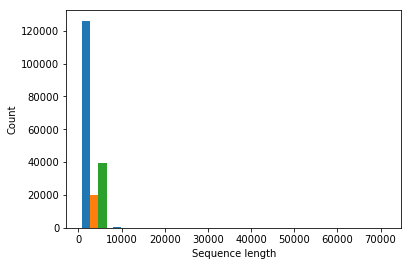

In [6]:
# Set up figure
#fig = plt.figure()
plt.hist([train, valid, test])
plt.xlabel('Sequence length')
plt.ylabel('Count')

# Visualize performances

In [8]:
wkdir = '/Users/Marianne/Dropbox (Personlig)/DTU/9. semester/02456_Deep_learning/project/results/'

In [11]:
# Load performances
performance = pd.read_csv(wkdir+'model_performances.csv', sep=';')
performance.head()

,model,direction,window_size,embedding_dimension,perplexity,accuracy
0,CBoW (Uniform),-,-,-,NaN,NaN
1,CBoW,before,1,2,18.041133,9.4163
2,CBoW,before,5,2,17.910000,9.8100
3,CBoW,before,10,2,17.870000,9.8900
4,CBoW,before,20,2,17.872976,9.9141


In [14]:
c_pre = performance.loc[performance.direction == 'before']
c_post = performance.loc[performance.direction == 'after']
c_both = performance.loc[performance.direction == 'both']
print(c_pre.head())
print(c_post.head())
print(c_both.head())

  model direction window_size embedding_dimension  perplexity  accuracy
1  CBoW    before           1                   2   18.041133    9.4163
2  CBoW    before           5                   2   17.910000    9.8100
3  CBoW    before          10                   2   17.870000    9.8900
4  CBoW    before          20                   2   17.872976    9.9141
  model direction window_size embedding_dimension  perplexity  accuracy
5  CBoW     after           1                   2   18.000508     9.750
6  CBoW     after           5                   2   17.940000     9.810
7  CBoW     after          10                   2   17.890000     9.930
8  CBoW     after          20                   2   17.866107     9.983
   model direction window_size embedding_dimension  perplexity  accuracy
9   CBoW      both           1                   2   17.989137    9.7214
10  CBoW      both           5                   2   17.800000   10.0600
11  CBoW      both          10                   2   17.74000

## Plot accuracy

In [21]:
acc = pd.DataFrame(data={'pre':c_pre.accuracy.values, 'post':c_post.accuracy.values, 'both':c_both.accuracy.values}, 
                  index=[1, 5, 10, 20])
acc.head()

,pre,post,both
1,9.4163,9.750,9.7214
5,9.8100,9.810,10.0600
10,9.8900,9.930,10.1600
20,9.9141,9.983,10.2755


(0, 21)

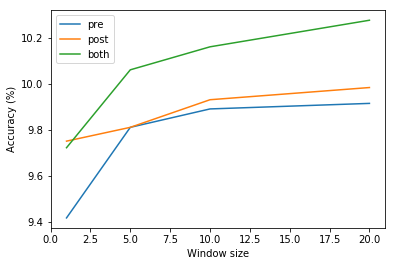

In [35]:
acc.plot()
plt.xlabel('Window size')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 21)

## Plot perplexity

In [27]:
perp = pd.DataFrame(data={'pre':c_pre.perplexity.values, 'post':c_post.perplexity.values, 'both':c_both.perplexity.values}, 
                  index=[1, 5, 10, 20])
perp.head()

,pre,post,both
1,18.041133,18.000508,17.989137
5,17.910000,17.940000,17.800000
10,17.870000,17.890000,17.740000
20,17.872976,17.866107,17.729718


(0, 21)

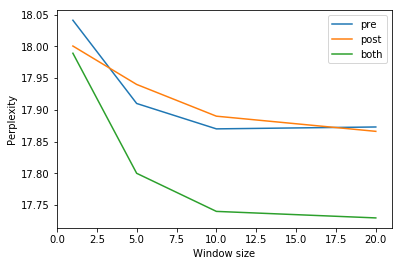

In [31]:
perp.plot()
plt.xlabel('Window size')
plt.ylabel('Perplexity')
plt.xlim(0, 21)

## Make combined plot for acc and perp

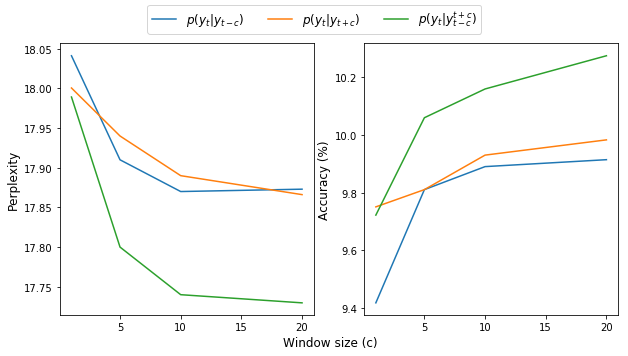

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# ax1 is perplexity
pre, post, both = ax1.plot(perp.index, perp.pre, 'C0', perp.index, perp.post, 'C1', perp.index, perp.both, 'C2')
#post = ax1.plot(perp.index, perp.post, '-', color='C1', label='$p\left(y_t|y_{t+c}\right)$')
#both = ax1.plot(perp.index, perp.both, '-', color='C2', label='$p\left(y_t|y_{t-c}^{t+c}\right)$')
ax1.set_ylabel('Perplexity', fontsize=12)

# ax2 is accuracy
ax2.plot(perp.index, acc.pre, '-', color='C0')
ax2.plot(perp.index, acc.post, '-', color='C1')
ax2.plot(perp.index, acc.both, '-', color='C2')
ax2.set_ylabel('Accuracy (%)', fontsize=12)

# Overall figure settings
fig.text(0.5, 0.04, 'Window size (c)', ha='center', fontsize=12)
fig.legend(handles=[pre, post, both], 
           loc='upper center', labels=['$p(y_t|y_{t-c})$', '$p(y_t|y_{t+c})$', '$p(y_t|y_{t-c}^{t+c})$'], 
           ncol=3, fontsize=12)
#          labels=['$p\left(y_t|y_{t-c}\right)$', '$p\left(y_t|y_{t+c}\right)$', '$p\left(y_t|y_{t-c}^{t+c}\right)$'])
#labels=['$p\left(y_t|y_{t-c}\right)$', '$p\left(y_t|y_{t+c}\right)$', '$p\left(y_t|y_{t-c}^{t+c}\right)$']
plt.savefig(wkdir+'performances.pdf', dpi=1000)